FunctionWithGui
===============

Introduction
------------

`FunctionWithGui` is one of the core classes of FiatLight: it wraps a function with a GUI that presents its inputs and outputs.

* **Manual**: Read the [manual](manual_function) for a detailed guide on how to use it.
* **Source code**: View its full code [online](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_core/function_with_gui.py).


Signature
---------

Below, you will find the "signature" of the `FunctionWithGui` class,
with its main attributes and methods (but not their bodies)

Its full source code is [available online](https://github.com/pthom/fiatlight/tree/refact_io/src/python/fiatlight/fiat_core/function_with_gui.py).

In [2]:
from fiatlight.fiat_notebook import look_at_code
%look_at_class_header fiatlight.fiat_core.FunctionWithGui

class FunctionWithGui:
    """FunctionWithGui: add GUI to a function

    `FunctionWithGui` is one of the core classes of FiatLight: it wraps a function with a GUI that presents its
    inputs and its output(s).

    Public Members
    ==============
    # the name of the function
    name: str = ""

    #
    # Behavioral Flags
    # ----------------
    # invoke_async: if true, the function shall be called asynchronously
    invoke_async: bool = False

    # invoke_manually: if true, the function will be called only if the user clicks on the "invoke" button
    # (if inputs were changed, a "Refresh needed" label will be displayed)
    invoke_manually: bool = False

    # invoke_always_dirty: if true, the function output will always be considered out of date, and
    #   - if invoke_manually is true, the "Refresh needed" label will be displayed
    #   - if invoke_manually is false, the function will be called at each frame
    # Note: a "live" function is thus a function with invoke_manually=False and invoke_always_dirty=True
    invoke_always_dirty: bool = False

    # Optional user documentation to be displayed in the GUI
    #     - doc_display: if True, the doc string is displayed in the GUI (default: False)
    #     - doc_is_markdown: if True, the doc string is in Markdown format (default: True)
    #     - doc_user: the documentation string. If not provided, the function docstring will be used
    #     - doc_show_source: if True, the source code of the function will be displayed in the GUI
    doc_display: bool = True
    doc_markdown: bool = True
    doc_user: str = ""
    doc_show_source: bool = False

    #
    # Internal state GUI
    # ------------------
    # internal_state_gui: optional Gui for the internal state of the function
    # (this function may display a GUI to show the internal state of the function,
    #  and return True if the state has changed, and the function needs to be called)
    internal_state_gui: BoolFunction | None = None

    # internal_state_gui_node_compatible:
    # If True, the internal_state_gui function is incompatible with being presented in a node
    # (this is due to a limitation of the node editor, which cannot render scrollable widgets)
    # Note: instead of setting edit_node_compatible to False, you may query
    #       `fiatlight.is_rendering_in_node()` to know if you are rendering in a node
    #       and choose alternative widgets in this case.
    internal_state_gui_node_compatible: bool = True

    #
    # Heartbeat
    # ---------
    # on_heartbeat: optional function that will be called at each frame
    # (and return True if the function needs to be called to update the output)
    on_heartbeat: BoolFunction | None = None

    #
    # Serialization
    # -------------
    # save/load_internal_gui_options_from_json (Optional)
    # Optional serialization and deserialization of the internal state GUI presentation options
    # (i.e. anything that deals with how the GUI is presented, not the data itself)
    # If provided, these functions will be used to recreate the GUI presentation options when loading a graph,
    # so that the GUI looks the same when the application is restarted.
    save_internal_gui_options_to_json: Callable[[], JsonDict] | None = None
    load_internal_gui_options_from_json: Callable[[JsonDict], None] | None = None

    """
    function_name: str = ''
    label: str = ''
    invoke_async: bool = False
    invoke_manually: bool = False
    invoke_always_dirty: bool = False
    invoke_is_gui_only: bool = False
    doc_display: bool = True
    doc_markdown: bool = True
    doc_user: str = ''
    doc_show_source: bool = False
    internal_state_gui: BoolFunction | None = None
    internal_state_gui_node_compatible: bool = True
    save_internal_gui_options_to_json: Callable[[], JsonDict] | None = None
    load_internal_gui_options_from_json: Callable[[JsonDict], None] | None = None
    on_heartbeat: BoolFunction | None = None
    _dirty: bool = T

Architecture
------------

Below is a PlantUML diagram showing the architecture of the `fiat_core` module.
See the [architecture page](api_architecture) for the full architecture diagrams.

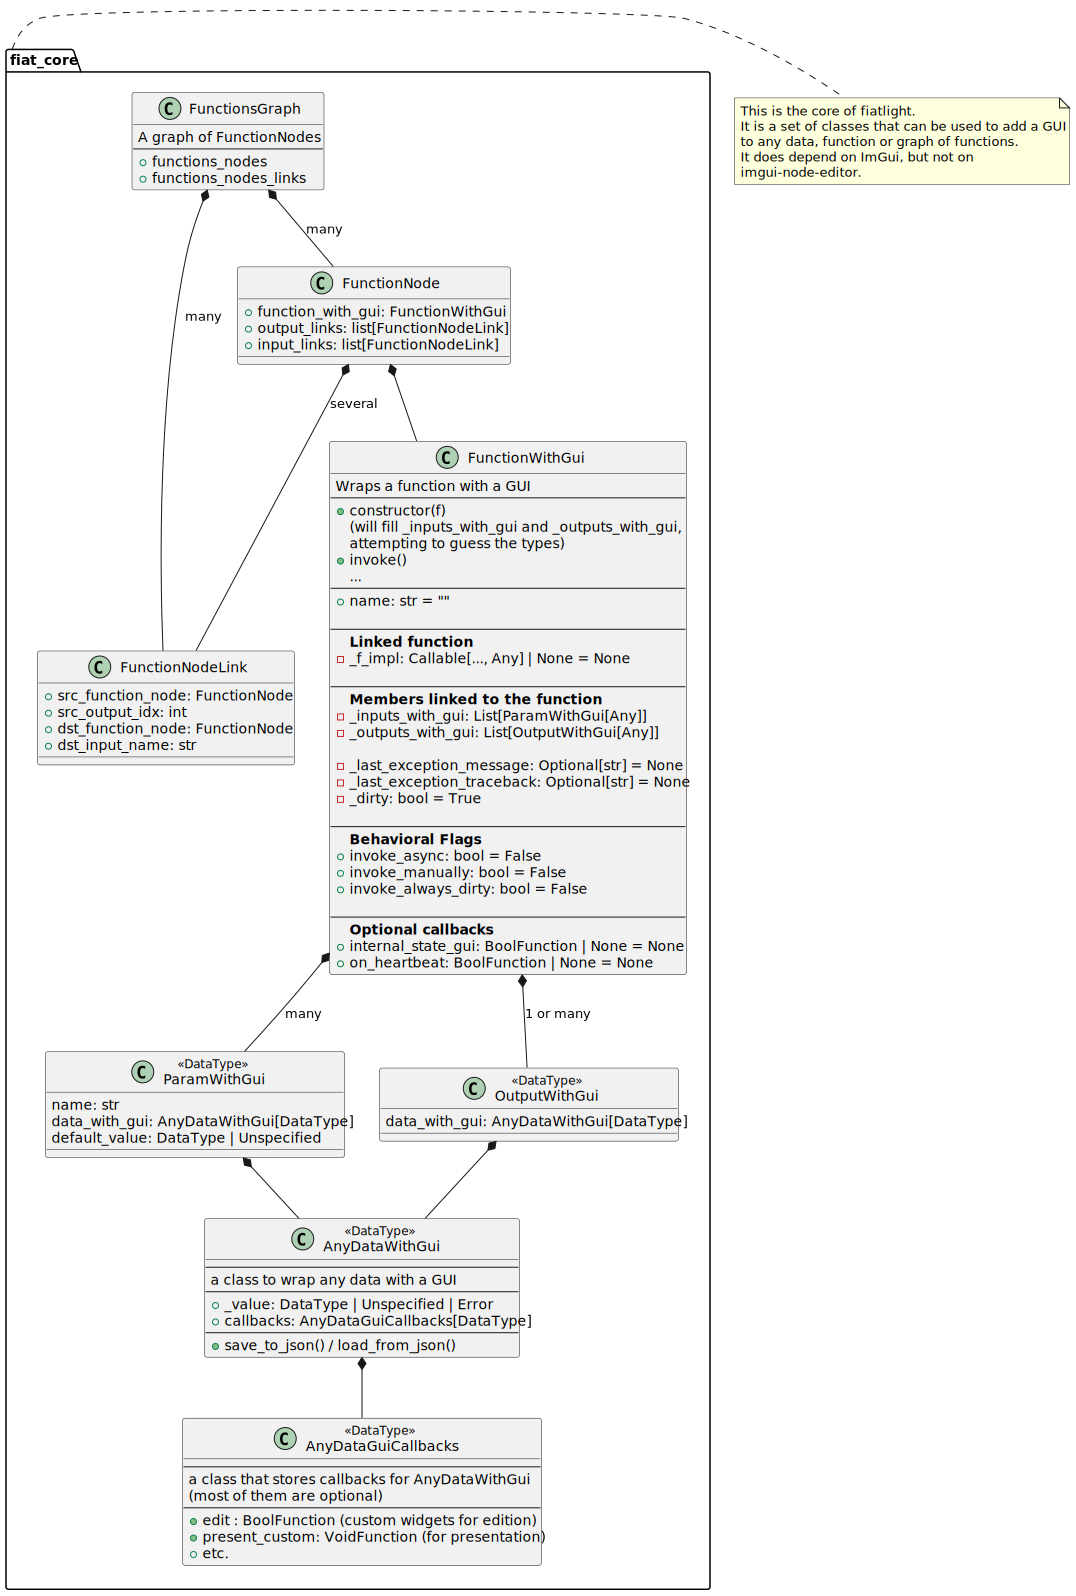

In [3]:
from fiatlight.fiat_notebook import plantuml_magic
%plantuml_include class_diagrams/fiat_core.puml